In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
# Label our dataset.
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

# "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist" will be Feature Vector label
# "class" Target vector label

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
# Converting g as 1 and h as 0
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


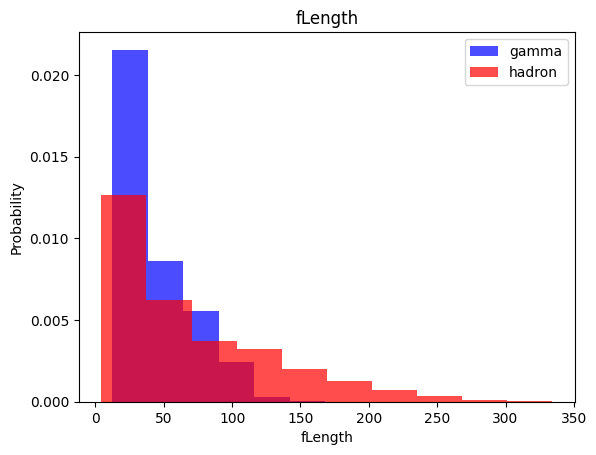

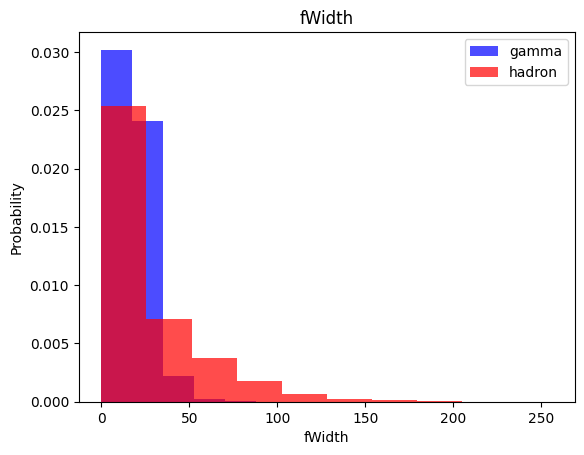

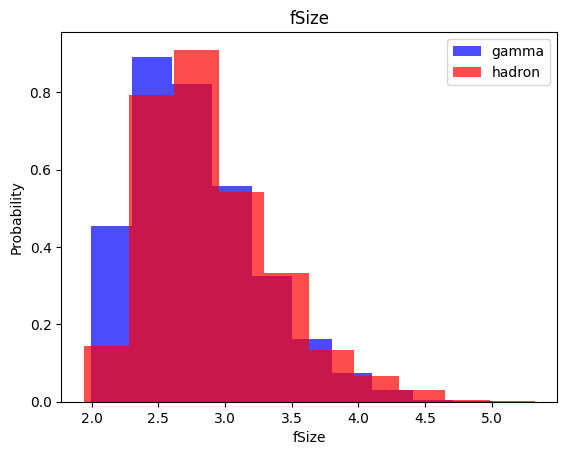

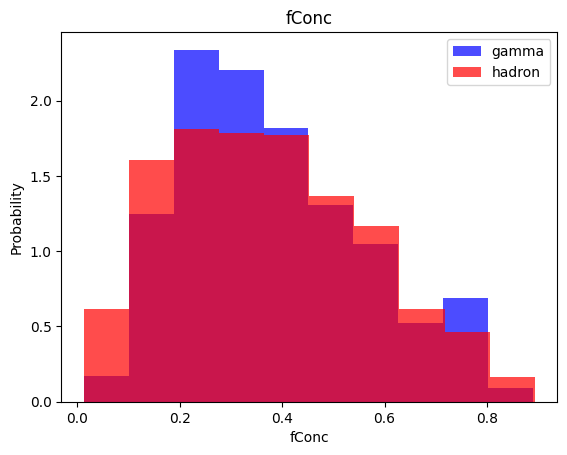

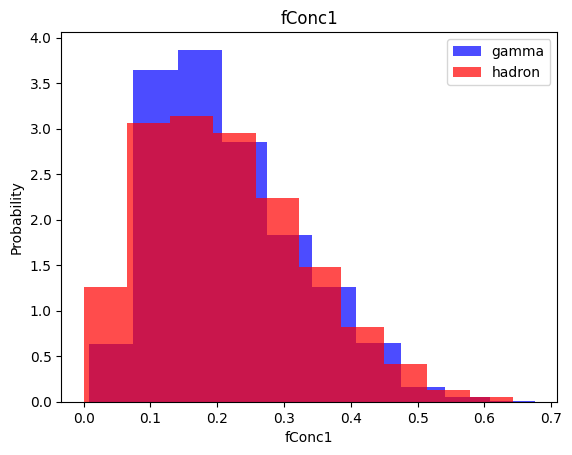

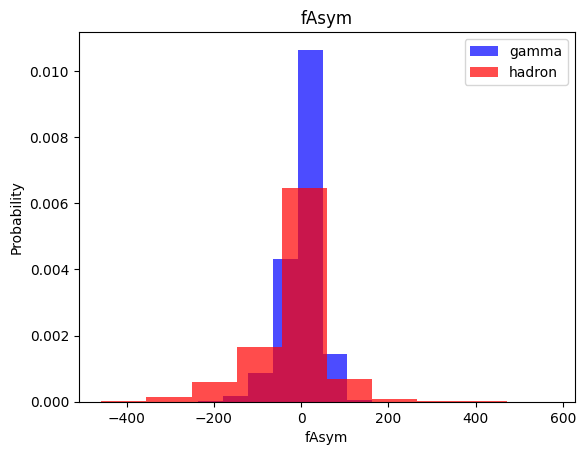

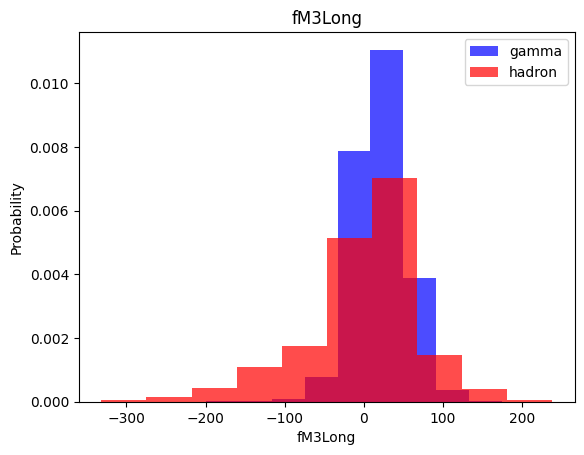

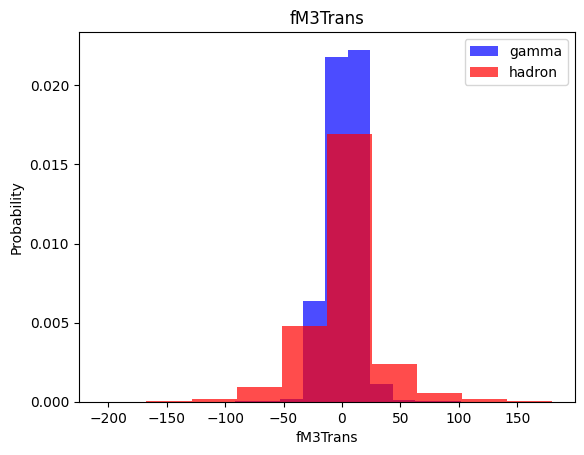

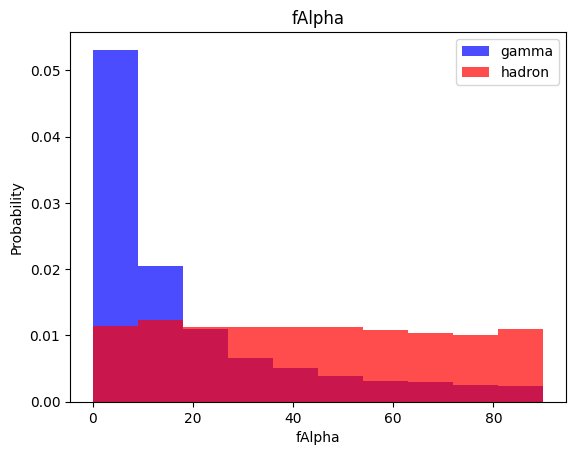

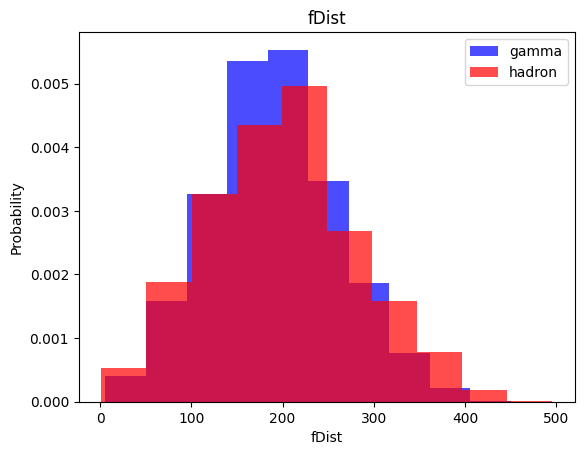

In [4]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
  

# Train, Validation, test datasets

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/Users/pierre/Documents/Code/Repos/misc/006-ml4everybody/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN (k-nearest neighbors)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1352
           1       0.86      0.86      0.86      2452

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53      1352
           1       0.74      0.91      0.82      2452

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Log Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1352
           1       0.84      0.82      0.83      2452

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM (Suppor Vector Machines)

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1352
           1       0.89      0.89      0.89      2452

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [22]:
import tensorflow as tf

In [23]:
def plot_history(history):
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
  ax1, ax2 = axs
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()


In [24]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, bacth_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                 metrics=['accuracy'])
  
  with tf.device('/device:CPU:0'):
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=bacth_size, validation_split=0.2, verbose=1)

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32
Epoch 1/100


/Users/pierre/Documents/Code/Repos/misc/006-ml4everybody/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-30 21:43:55.139386: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-30 21:43:55.139411: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-05-30 21:43:55.139416: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-05-30 21:43:55.139433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-30 21:43:55.139448: I tensorflow/core/common_runtime/pluggable_device

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7840 - loss: 0.4574 - val_accuracy: 0.7015 - val_loss: 0.5863
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.3491 - val_accuracy: 0.7916 - val_loss: 0.3948
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3346 - val_accuracy: 0.8123 - val_loss: 0.3591
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3302 - val_accuracy: 0.7435 - val_loss: 0.4924
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8663 - loss: 0.3273 - val_accuracy: 0.7496 - val_loss: 0.4911
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3291 - val_accuracy: 0.7604 - val_loss: 0.4605
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3226 - val_accuracy: 0.6967 - val_loss: 0.6153
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3218 - val_accuracy: 0.7604

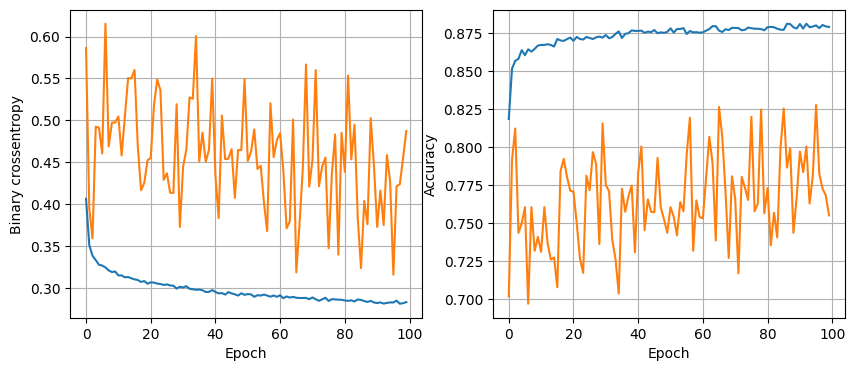

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8851 - loss: 0.3047
16 nodes, dropout 0, lr 0.01, batch size 64
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7636 - loss: 0.4788 - val_accuracy: 0.6703 - val_loss: 0.6374
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.3655 - val_accuracy: 0.7286 - val_loss: 0.5376
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3399 - val_accuracy: 0.7787 - val_loss: 0.4192
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3344 - val_accuracy: 0.6710 - val_loss: 0.6124
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3290 - val_accuracy: 0.6676 - val_loss: 0.6167
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.3212 - val_accuracy: 0.7414 - val_loss: 0.5108
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3174 - val_accuracy: 0.71

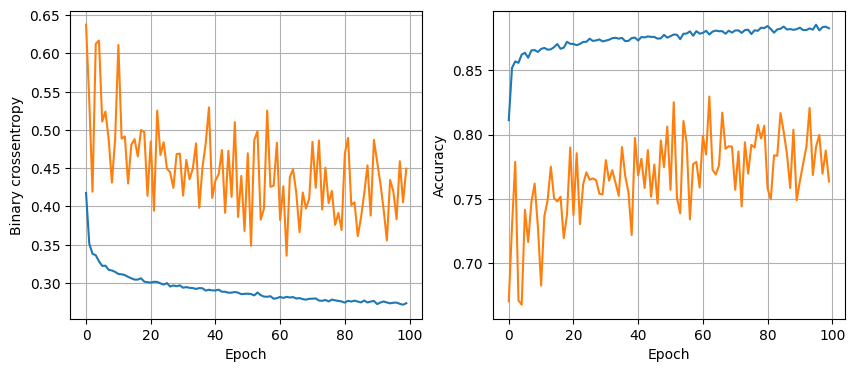

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8693 - loss: 0.3088
16 nodes, dropout 0, lr 0.01, batch size 128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7351 - loss: 0.5148 - val_accuracy: 0.7038 - val_loss: 0.6188
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3637 - val_accuracy: 0.7597 - val_loss: 0.4769
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3418 - val_accuracy: 0.7201 - val_loss: 0.5797
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3333 - val_accuracy: 0.7309 - val_loss: 0.5474
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3226 - val_accuracy: 0.7523 - val_loss: 0.4747
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8612 - loss: 0.3337 - val_accuracy: 0.7374 - val_loss: 0.5004
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8567 - loss: 0.3286 - val_accuracy: 0.7797 - val_loss

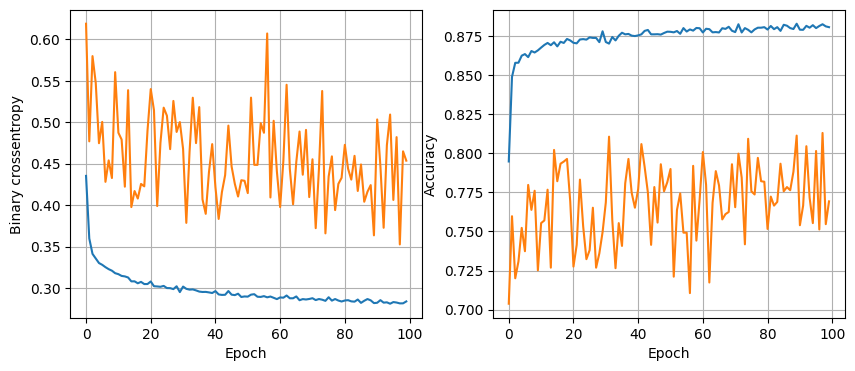

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8780 - loss: 0.2980
16 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7638 - loss: 0.4785 - val_accuracy: 0.6764 - val_loss: 0.6450
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3669 - val_accuracy: 0.7235 - val_loss: 0.5717
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3419 - val_accuracy: 0.7435 - val_loss: 0.5259
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3268 - val_accuracy: 0.7699 - val_loss: 0.4337
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8626 - loss: 0.3206 - val_accuracy: 0.7621 - val_loss: 0.4472
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3223 - val_accuracy: 0.7499 - val_loss: 0.4749
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8650 - loss: 0.3165 - val_accuracy: 0.7

In [25]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_node in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_node} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_node, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model

## 2h09min mark